Metric: [4.35525711 4.89276653 4.95832707 5.57984503 5.69283842]
transl distances (m): [0.95578273 1.50394898 1.5331788  2.19121554 2.23962872]
rot distances (deg): [38.95510694 38.83298853 39.24930801 38.83083362 39.57086833]


<IPython.core.display.Javascript object>


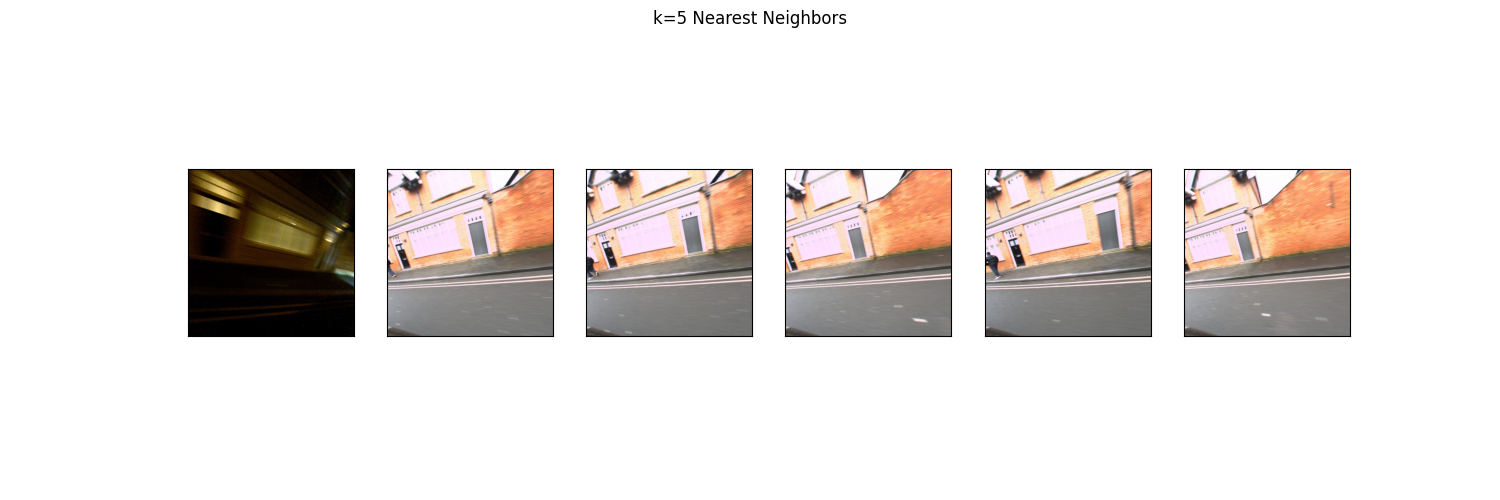

Number of images in radius 10: 20


<IPython.core.display.Javascript object>


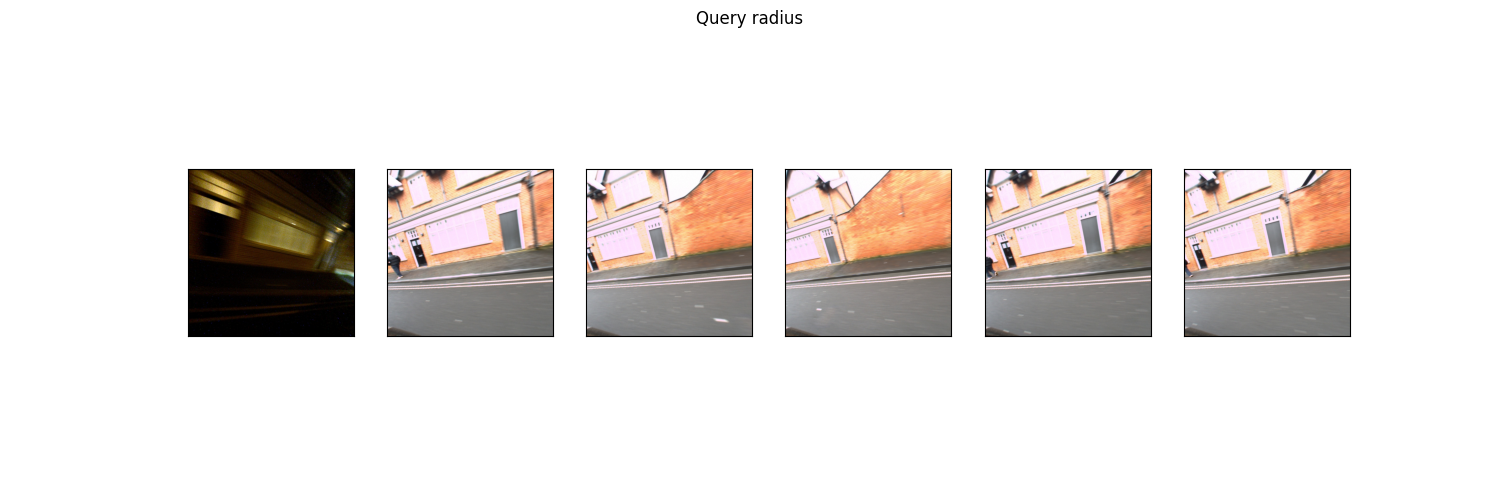

In [10]:
import os

import numpy as np
import pickle
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from QUT.datasets import Traverse
from QUT import geometry
from hfnet.settings import DATA_PATH

#### Traverses to test ####

ref_traverse = 'overcast-reference'
query_traverse = 'night'
query_cam = 'left'
img_no = 143 # 143 is reverse of reference and query

#### Parameters ####

k = 5
radius = 10
alpha = 5

####################

with open(os.path.join(DATA_PATH, 'robotcar/gps', ref_traverse + '.pickle'), 'rb') as f:
    reference = pickle.load(f)
    
with open(os.path.join(DATA_PATH, 'robotcar/gps', query_traverse + '.pickle'), 'rb') as f:
    query = pickle.load(f)
    
ex_tstamp = list(getattr(query, query_cam).tstamps())[img_no]
ex_pose = query.left[ex_tstamp]

nn_poses, nn_tstamps, nn_cameras = reference.NN(ex_pose, k=k)

print('Metric:', geometry.metric(ex_pose, geometry.combine(nn_poses), alpha))
t_dists, R_dists = geometry.distances(ex_pose, geometry.combine(nn_poses))
print('transl distances (m):', t_dists)
print('rot distances (deg):', R_dists * 180 / np.pi)

# display query and reference images for kNN search

query_img_path = os.path.join(DATA_PATH, 'robotcar/images', query_traverse, query_cam, str(ex_tstamp) + '.jpg')

ref_imgs = []
for tstamp, cam in zip(nn_tstamps, nn_cameras):
    ref_img_path = os.path.join(DATA_PATH, 'robotcar/images', ref_traverse, cam, str(tstamp) + '.jpg')
    ref_imgs.append(mpimg.imread(ref_img_path))
    
fig, axs = plt.subplots(1, k+1, figsize=(15, 5))
fig.suptitle('k={} Nearest Neighbors'.format(k))
    
qImg = mpimg.imread(query_img_path)
axs[0].imshow(qImg)
axs[0].set_xticks([])
axs[0].set_yticks([])

for i in range(1, len(axs)):
    axs[i].imshow(ref_imgs[i-1])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()

# query radius test

rad_poses, rad_tstamps, rad_cameras = reference.query_radius(ex_pose, radius, alpha=alpha)

print("Number of images in radius {}: {}".format(radius, len(rad_poses)))

fig, axs = plt.subplots(1, k+1, figsize=(15, 5))
fig.suptitle('Query radius')

ref_imgs = []
for tstamp, cam in zip(rad_tstamps, rad_cameras):
    ref_img_path = os.path.join(DATA_PATH, 'robotcar/images', ref_traverse, cam, str(tstamp) + '.jpg')
    ref_imgs.append(mpimg.imread(ref_img_path))

qImg = mpimg.imread(query_img_path)
axs[0].imshow(qImg)
axs[0].set_xticks([])
axs[0].set_yticks([])

for i in range(1, len(axs)):
    axs[i].imshow(ref_imgs[i-1])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()